<a href="https://colab.research.google.com/github/zubairTalha683/Simulation-lab-test/blob/main/Lab_Test_(Sat_A2)_id_1065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

data = {
    "Customer_ID": np.arange(1, 21),
    "Daily_Arrivals": [8, 12, 10, 15, 9, 13, 11, 14, 7, 16,
                       10, 12, 9, 15, 11, 13, 14, 8, 12, 10]
}

df = pd.DataFrame(data)

# --- 1. Basic Statistics ---

mean_arrivals = df['Daily_Arrivals'].mean()
pop_var = df['Daily_Arrivals'].var(ddof=0)  # population variance
sample_var = df['Daily_Arrivals'].var(ddof=1)  # sample variance
pop_std = np.sqrt(pop_var)
sample_std = np.sqrt(sample_var)

print("=== Basic Statistics ===")
print(f"Mean Daily Arrivals: {mean_arrivals:.2f}")
print(f"Population Variance: {pop_var:.2f}")
print(f"Sample Variance: {sample_var:.2f}")
print(f"Population Std Dev: {pop_std:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}\n")

print("Explanation:")
print("Population variance uses N in denominator, sample variance uses N-1,")
print("which corrects bias when estimating variance from a sample.\n")

=== Basic Statistics ===
Mean Daily Arrivals: 11.45
Population Variance: 6.35
Sample Variance: 6.68
Population Std Dev: 2.52
Sample Std Dev: 2.58

Explanation:
Population variance uses N in denominator, sample variance uses N-1,
which corrects bias when estimating variance from a sample.



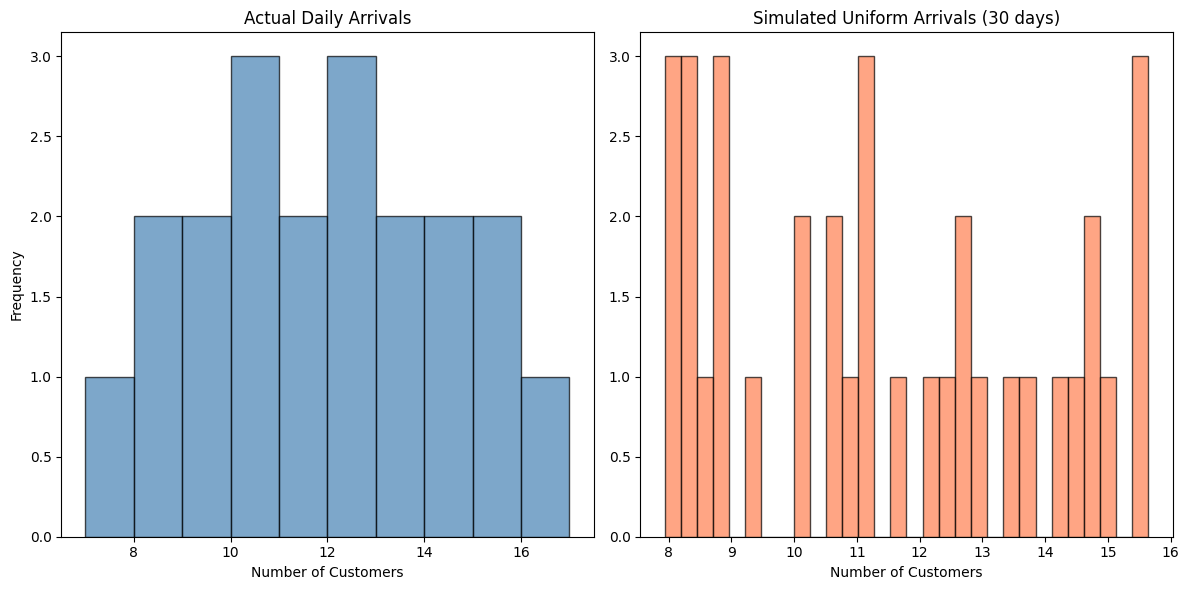

In [3]:
# --- 2. Random Number Generation ---
# Assume uniform distribution: min and max from data
min_arrivals = df['Daily_Arrivals'].min()
max_arrivals = df['Daily_Arrivals'].max()

np.random.seed(44)
simulated_arrivals = np.random.uniform(low=min_arrivals, high=max_arrivals, size=35)

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(df['Daily_Arrivals'], bins=range(min_arrivals, max_arrivals+2),
             color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title("Actual Daily Arrivals")
axes[0].set_xlabel("Number of Customers")
axes[0].set_ylabel("Frequency")

axes[1].hist(simulated_arrivals, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title("Simulated Uniform Arrivals (30 days)")
axes[1].set_xlabel("Number of Customers")

plt.tight_layout()
plt.show()

In [7]:
# --- 3. Monte Carlo Simulation ---
mc_samples = np.random.uniform(low=min_arrivals, high=max_arrivals, size=100000)
prob_gt_15 = np.mean(mc_samples > 15)

print(f"Monte Carlo Simulation:")
print(f"Estimated Probability that arrivals > 15 = {prob_gt_15:.4f}\n")

Monte Carlo Simulation:
Estimated Probability that arrivals > 15 = 0.1112



=== Hypothesis Testing ===
Hypothesized Mean: 15
t-statistic: -6.1419
p-value: 0.0000
Conclusion: Reject null hypothesis — mean arrivals differ significantly from hypothesized mean.


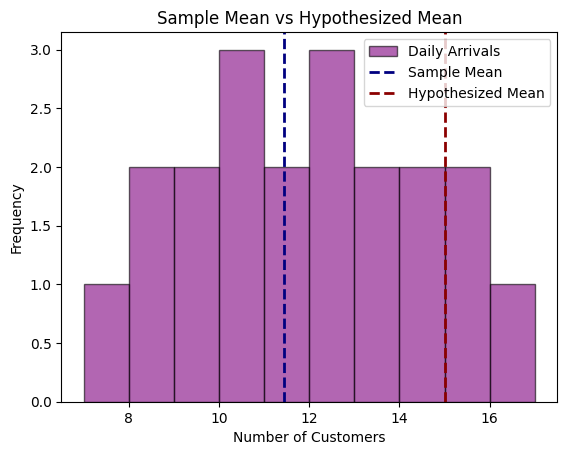


Interpretation:
Given the p-value = 0.0000, we reject the null hypothesis that the mean daily arrivals equal 15
This suggests that the average daily arrivals is not consistent with the hypothesized mean based on your Student ID.


In [6]:
# --- 4. Hypothesis Testing ---
# Replace with your actual last 3 digits of Student_ID here:
student_id_last_3 = 165
hypothesized_mean = (student_id_last_3 % 10) + 10

t_stat, p_val = ttest_1samp(df['Daily_Arrivals'], hypothesized_mean)

print("=== Hypothesis Testing ===")
print(f"Hypothesized Mean: {hypothesized_mean}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    conclusion = "Reject null hypothesis — mean arrivals differ significantly from hypothesized mean."
else:
    conclusion = "Fail to reject null hypothesis — insufficient evidence to say means differ."

print("Conclusion:", conclusion)

# Visualization of sample vs hypothesized mean
plt.hist(df['Daily_Arrivals'], bins=range(min_arrivals, max_arrivals+2),
         alpha=0.6, color='purple', edgecolor='black', label="Daily Arrivals")
plt.axvline(mean_arrivals, color='navy', linestyle='--', linewidth=2, label='Sample Mean')
plt.axvline(hypothesized_mean, color='darkred', linestyle='--', linewidth=2, label='Hypothesized Mean')
plt.title("Sample Mean vs Hypothesized Mean")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Interpretation ---
print("\nInterpretation:")
print(f"Given the p-value = {p_val:.4f},",
      "we", "reject" if p_val < 0.05 else "fail to reject",
      "the null hypothesis that the mean daily arrivals equal", hypothesized_mean)
print("This suggests that the average daily arrivals",
      "is" if p_val >= 0.05 else "is not",
      "consistent with the hypothesized mean based on your Student ID.")